# Team 1 - Project 1

In [1]:
# Team 1 LendingClub primary notebook
# import dependencies
from matplotlib.ticker import FormatStrFormatter
import pandas as pd
import numpy as np  # needed for replace nan code below
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [2]:
# pull in all csvs and merge them into a single dataframe
bigdf = pd.concat([pd.read_csv(f, low_memory=False, usecols=[
    'issue_d', 'loan_amnt', 'term', 'int_rate', 'installment',
    'emp_length', 'home_ownership', 'annual_inc', 'open_acc',
    'grade', 'addr_state', 'delinq_amnt', 'loan_status', 'tot_cur_bal',
    'purpose', 'earliest_cr_line', 'pct_tl_nvr_dlq','mths_since_recent_bc_dlq',
    'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
    'mths_since_recent_bc','title'    
]) for f in glob.glob('data/LoanStats*.csv')], ignore_index=True)

# drop all the empty rows
bigdf.dropna(subset=['term', 'issue_d'], inplace=True)

date_dictionary = {
    "Dec-18": 12,
    "Nov-18": 11,
    "Oct-18": 10,
    "Sep-18": 9,
    "Aug-18": 8,
    "Jul-18": 7,
    "Jun-18": 6,
    "May-18": 5,
    "Apr-18": 4,
    "Mar-18": 3,
    "Feb-18": 2,
    "Jan-18": 1,
}

bigdf["month_num"] = ""  # create new column
bigdf["month_num"] = bigdf["issue_d"].map(date_dictionary)  # map month numbers
bigdf["month_num"] = bigdf["month_num"].round(0).astype(int)  # convert to int from float

# Alice's Code

In [3]:
debt_column = bigdf[["issue_d", "purpose", "addr_state", "earliest_cr_line", "emp_length","annual_inc", "tot_cur_bal",
                            "home_ownership", "int_rate", "grade","pct_tl_nvr_dlq"]]
debt_column.head()

,issue_d,purpose,addr_state,earliest_cr_line,emp_length,annual_inc,tot_cur_bal,home_ownership,int_rate,grade,pct_tl_nvr_dlq
0,Mar-18,house,TX,Oct-09,3 years,95000.0,12704.0,OWN,7.34%,A,90.0
1,Mar-18,credit_card,AZ,Jan-03,2 years,125000.0,68270.0,MORTGAGE,12.61%,C,96.3
2,Mar-18,other,MI,Aug-11,3 years,62000.0,241067.0,MORTGAGE,7.96%,A,100.0
3,Mar-18,home_improvement,VA,Jan-01,3 years,110000.0,365026.0,MORTGAGE,9.92%,B,90.9
4,Mar-18,debt_consolidation,FL,Apr-99,10+ years,52000.0,18039.0,RENT,20.39%,D,85.7


In [4]:
grade_dictionary = {
    "G": 7,
    "F": 6,
    "E": 5,
    "D": 4,
    "C": 3,
    "B": 2,
    "A": 1,
}

bigdf["numericGrade"] = ""  # create new column
bigdf["numericGrade"] = bigdf["grade"].map(grade_dictionary)  # map grade numbers
bigdf["numericGrade"] = bigdf["numericGrade"].round(0).astype(int)  # convert to int from float

bigdf.head()


,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,...,open_acc,tot_cur_bal,delinq_amnt,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,pct_tl_nvr_dlq,month_num,numericGrade
0,30000.0,36 months,7.34%,930.99,A,3 years,OWN,95000.0,Mar-18,Fully Paid,...,10.0,12704.0,0.0,19.0,NaN,24.0,10.0,90.0,3,1
1,34825.0,60 months,12.61%,785.45,C,2 years,MORTGAGE,125000.0,Mar-18,Current,...,12.0,68270.0,0.0,14.0,45.0,15.0,45.0,96.3,3,3
2,2600.0,36 months,7.96%,81.43,A,3 years,MORTGAGE,62000.0,Mar-18,Current,...,8.0,241067.0,0.0,45.0,NaN,NaN,NaN,100.0,3,1
3,20000.0,60 months,9.92%,424.16,B,3 years,MORTGAGE,110000.0,Mar-18,Current,...,9.0,365026.0,0.0,8.0,NaN,4.0,NaN,90.9,3,2
4,17000.0,60 months,20.39%,454.10,D,10+ years,RENT,52000.0,Mar-18,Current,...,9.0,18039.0,0.0,19.0,77.0,0.0,77.0,85.7,3,4


In [5]:
# clean up and format the interest rate
bigdf['int_rate'] = bigdf['int_rate'].astype(str)
bigdf['int_rate'] = bigdf['int_rate'].str.replace('%','')
bigdf['int_rate'] = pd.to_numeric(bigdf['int_rate'], errors='coerce')
bigdf.dtypes

loan_amnt                         float64
term                               object
int_rate                          float64
installment                       float64
grade                              object
emp_length                         object
home_ownership                     object
annual_inc                        float64
issue_d                            object
loan_status                        object
purpose                            object
title                              object
addr_state                         object
earliest_cr_line                   object
open_acc                          float64
tot_cur_bal                       float64
delinq_amnt                       float64
mths_since_recent_bc              float64
mths_since_recent_bc_dlq          float64
mths_since_recent_inq             float64
mths_since_recent_revol_delinq    float64
pct_tl_nvr_dlq                    float64
month_num                           int32
numericGrade                      

In [6]:
debt_purpose = bigdf['purpose'].value_counts()
debt_purpose

debt_consolidation    259642
credit_card           127702
other                  35018
home_improvement       32748
major_purchase         11622
medical                 6622
house                   5430
car                     4979
small_business          4583
vacation                3501
moving                  3115
renewable_energy         275
wedding                    5
Name: purpose, dtype: int64

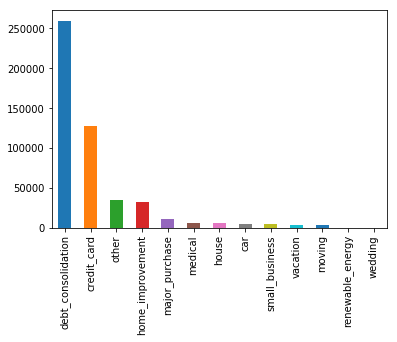

In [7]:
debt_cons1 = debt_purpose.plot.bar()
plt.show()

In [8]:
debt_compare = bigdf.loc[bigdf['purpose'] == "debt_consolidation"]
debt_compare.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,...,open_acc,tot_cur_bal,delinq_amnt,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,pct_tl_nvr_dlq,month_num,numericGrade
4,17000.0,60 months,20.39,454.10,D,10+ years,RENT,52000.0,Mar-18,Current,...,9.0,18039.0,0.0,19.0,77.0,0.0,77.0,85.7,3,4
6,20000.0,36 months,10.41,649.21,B,NaN,MORTGAGE,19000.0,Mar-18,Current,...,6.0,17709.0,0.0,24.0,NaN,0.0,NaN,100.0,3,2
8,15000.0,36 months,9.92,483.45,B,2 years,OWN,196000.0,Mar-18,Current,...,19.0,534954.0,0.0,11.0,NaN,6.0,NaN,98.0,3,2
9,6500.0,36 months,6.07,197.95,A,10+ years,MORTGAGE,50000.0,Mar-18,In Grace Period,...,7.0,243513.0,0.0,21.0,NaN,NaN,NaN,93.8,3,1
13,3200.0,36 months,7.96,100.22,A,1 year,RENT,42000.0,Mar-18,Current,...,8.0,14533.0,0.0,5.0,NaN,1.0,NaN,100.0,3,1


In [9]:
print(debt_compare["annual_inc"].max())
print(debt_compare["annual_inc"].min())

9930475.0
0.0


In [10]:
print(debt_compare["int_rate"].max())
print(debt_compare["int_rate"].min())

30.99
5.31


In [11]:
debt_purpose.dtypes

dtype('int64')

In [12]:
debt_compare.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,...,open_acc,tot_cur_bal,delinq_amnt,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,pct_tl_nvr_dlq,month_num,numericGrade
4,17000.0,60 months,20.39,454.10,D,10+ years,RENT,52000.0,Mar-18,Current,...,9.0,18039.0,0.0,19.0,77.0,0.0,77.0,85.7,3,4
6,20000.0,36 months,10.41,649.21,B,NaN,MORTGAGE,19000.0,Mar-18,Current,...,6.0,17709.0,0.0,24.0,NaN,0.0,NaN,100.0,3,2
8,15000.0,36 months,9.92,483.45,B,2 years,OWN,196000.0,Mar-18,Current,...,19.0,534954.0,0.0,11.0,NaN,6.0,NaN,98.0,3,2
9,6500.0,36 months,6.07,197.95,A,10+ years,MORTGAGE,50000.0,Mar-18,In Grace Period,...,7.0,243513.0,0.0,21.0,NaN,NaN,NaN,93.8,3,1
13,3200.0,36 months,7.96,100.22,A,1 year,RENT,42000.0,Mar-18,Current,...,8.0,14533.0,0.0,5.0,NaN,1.0,NaN,100.0,3,1


In [13]:
home_type1 = debt_compare['int_rate'].value_counts()
home_type1.head()

13.56    7993
15.02    7755
14.47    7101
16.14    6761
11.55    6650
Name: int_rate, dtype: int64

In [14]:
home_type = debt_compare['home_ownership'].value_counts()
home_type

MORTGAGE    126282
RENT        103628
OWN          29474
ANY            258
Name: home_ownership, dtype: int64

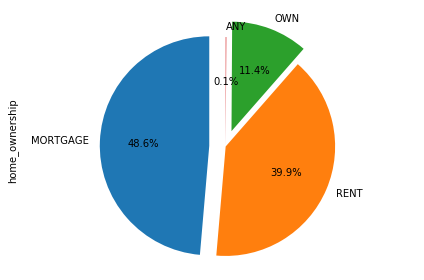

In [15]:
home_type.plot.pie(
           shadow=False,
           explode=(0.15, 0, 0.15, 0),   
           startangle=90,
           autopct='%1.1f%%')

plt.axis('equal')
plt.tight_layout()
plt.show()

In [16]:
region_debt1 = debt_compare['home_ownership'].value_counts()
region_debt1

MORTGAGE    126282
RENT        103628
OWN          29474
ANY            258
Name: home_ownership, dtype: int64

In [17]:
region_debt = debt_compare['addr_state'].value_counts()
region_debt.head()

CA    35247
TX    21394
NY    19498
FL    19364
IL    10017
Name: addr_state, dtype: int64

### Region 1: Northeast
#### Division 1: New England (Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, and Vermont)
#### Division 2: Mid-Atlantic (New Jersey, New York, and Pennsylvania)


In [18]:
north_east = ["CT", "ME", "MA", "NH", "RI", "VT", "NJ", "NY", "PA"]
north_east 

['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA']

### Region 2: Midwest (Prior to June 1984, the Midwest Region was designated as the North Central Region
#### Division 3: East North Central (Illinois, Indiana, Michigan, Ohio, and Wisconsin)
#### Division 4: West North Central (Iowa, Kansas, Minnesota, Missouri, Nebraska, North Dakota, and South Dakota)

In [19]:
mid_west = ["IL", "IN", "MI", "OH", "WI", "IA", "KS", "MN", "MO", "NE", "ND", "SD",]
mid_west

['IL', 'IN', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD']

### Region 3: South
#### Division 5: South Atlantic (Delaware, Florida, Georgia, Maryland, North Carolina, South Carolina, Virginia, District of Columbia, and West Virginia)
#### Division 6: East South Central (Alabama, Kentucky, Mississippi, and Tennessee)
#### Division 7: West South Central (Arkansas, Louisiana, Oklahoma, and Texas)

In [20]:
south = ["DE", "FL", "GA", "MD", "NC", "SC", "VA", "DC", "WV", "AL", "KY", "MS", "TN", "AR", "LA", "OK", "TX"]
south

['DE',
 'FL',
 'GA',
 'MD',
 'NC',
 'SC',
 'VA',
 'DC',
 'WV',
 'AL',
 'KY',
 'MS',
 'TN',
 'AR',
 'LA',
 'OK',
 'TX']

### Region 4: West
#### Division 8: Mountain (Arizona, Colorado, Idaho, Montana, Nevada, New Mexico, Utah, and Wyoming)
#### Division 9: Pacific (Alaska, California, Hawaii, Oregon, and Washington)

In [21]:
west =  ["AZ", "CO", "ID", "MT", "NV", "NM", "UT", "WY", "AK", "CA", "HI", "OR", "WA"]
west 

['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY', 'AK', 'CA', 'HI', 'OR', 'WA']

In [22]:
def addRegion(addr_state):
    if addr_state in north_east:
        return 'Northeast'
    if addr_state in mid_west:
        return 'Midwest'
    if addr_state in south:
        return 'South'
    if addr_state in west:
        return 'West'
    
debt_compare['Region'] = debt_compare.addr_state.apply(addRegion)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [23]:
debt_compare

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,...,tot_cur_bal,delinq_amnt,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,pct_tl_nvr_dlq,month_num,numericGrade,Region
4,17000.0,60 months,20.39,454.10,D,10+ years,RENT,52000.00,Mar-18,Current,...,18039.0,0.0,19.0,77.0,0.0,77.0,85.7,3,4,South
6,20000.0,36 months,10.41,649.21,B,NaN,MORTGAGE,19000.00,Mar-18,Current,...,17709.0,0.0,24.0,NaN,0.0,NaN,100.0,3,2,South
8,15000.0,36 months,9.92,483.45,B,2 years,OWN,196000.00,Mar-18,Current,...,534954.0,0.0,11.0,NaN,6.0,NaN,98.0,3,2,South
9,6500.0,36 months,6.07,197.95,A,10+ years,MORTGAGE,50000.00,Mar-18,In Grace Period,...,243513.0,0.0,21.0,NaN,NaN,NaN,93.8,3,1,West
13,3200.0,36 months,7.96,100.22,A,1 year,RENT,42000.00,Mar-18,Current,...,14533.0,0.0,5.0,NaN,1.0,NaN,100.0,3,1,Northeast
14,3000.0,36 months,11.98,99.62,B,10+ years,OWN,52000.00,Mar-18,Current,...,74761.0,0.0,NaN,NaN,14.0,NaN,100.0,3,2,Northeast
16,17000.0,36 months,10.90,555.76,B,10+ years,OWN,70000.00,Mar-18,Charged Off,...,43112.0,0.0,11.0,NaN,21.0,NaN,100.0,3,2,West
17,34000.0,60 months,10.41,729.28,B,2 years,RENT,105000.00,Mar-18,Current,...,82699.0,0.0,5.0,NaN,12.0,NaN,100.0,3,2,West
20,3000.0,36 months,9.43,96.01,B,10+ years,RENT,97000.00,Mar-18,Current,...,17145.0,0.0,193.0,33.0,NaN,33.0,70.0,3,2,West
22,10000.0,36 months,9.43,320.01,B,10+ years,MORTGAGE,65000.00,Mar-18,Current,...,186484.0,0.0,7.0,NaN,3.0,NaN,88.9,3,2,Northeast


In [24]:
def get_region (row):
    for column in ["south", "north_east", "mid_west", "west"]:
        if row[column]:
            return column

In [25]:
#Create new column
newdf = pd.DataFrame([('West', 67325),
                   ('South', 95362),
                   ('Mid-West', 45681),
                  ('North-East', 51274)],
                 index=['West', 'South', 'Mid-West', 'North-East'],
                 columns=('Region', 'Total Borrowers'))
newdf

,Region,Total Borrowers
West,West,67325
South,South,95362
Mid-West,Mid-West,45681
North-East,North-East,51274


In [26]:
debt_compare['numericGrade'].value_counts()

2    72661
3    71138
1    61704
4    40487
5    11274
6     1972
7      406
Name: numericGrade, dtype: int64

In [27]:
debt_compare['int_rate'].value_counts()

13.56    7993
15.02    7755
14.47    7101
16.14    6761
11.55    6650
16.91    6488
6.11     6209
7.84     6067
10.47    5637
8.46     5532
12.73    5269
10.08    5103
17.97    4931
18.94    4615
11.06    4447
7.21     4435
19.92    4271
6.67     4002
20.89    3532
11.98    3527
10.90    3387
5.31     3387
12.61    3292
17.47    3290
14.07    3160
18.45    3122
22.35    3108
13.58    3070
9.92     3056
9.43     3012
         ... 
17.09    1186
18.06    1126
25.34    1124
19.03    1124
26.77    1092
20.00    1016
5.32      983
21.45     983
26.31     965
28.72     957
24.37     934
24.84     837
25.81     751
22.90     557
23.87     496
23.88     381
30.79     331
29.69     330
24.85     323
26.30     299
25.82     282
30.17     258
30.75     222
30.65     204
22.91     163
6.00       40
30.89      27
30.84      25
30.94      14
30.99       9
Name: int_rate, Length: 110, dtype: int64

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


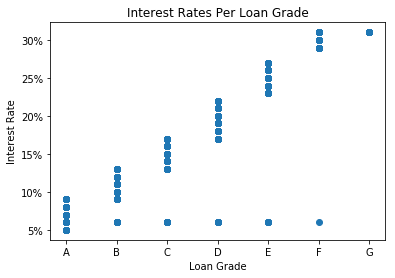

In [28]:
#Direct Correlation between interest rate and Grade Score
debt_compare['int_rate'] = pd.to_numeric(debt_compare['int_rate'], errors='coerce')
debt_compare['int_rate'] = debt_compare['int_rate'].round(0).astype(int) 
plt.scatter(debt_compare['numericGrade'], debt_compare['int_rate'])
ax = plt.gca() # grab the current axis
ax.set_xticklabels(['','A','B','C','D','E','F','G'])
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f%%'))
plt.xlabel("Loan Grade")
plt.ylabel("Interest Rate")
plt.title("Interest Rates Per Loan Grade")
plt.show()

# Mike's Code

In [37]:
mike_df=bigdf[bigdf.emp_length!= '10+ years']
mike_df=mike_df[mike_df.emp_length!= 0]
mike_df['emp_length'] = mike_df['emp_length'].str.replace("years","")
mike_df['emp_length'] = mike_df['emp_length'].str.replace("year","")
mike_df['emp_length'] = mike_df['emp_length'].str.replace("<","")

mike_df['rd_loan_amnt'] = mike_df['loan_amnt'].div(1000000).round(2)

mike_df['emp_length'] = pd.to_numeric(mike_df['emp_length'], errors='coerce')

In [43]:
mike_df['mths_since_recent_bc']=mike_df['mths_since_recent_bc'].replace(np.nan, 0)
mike_df['mths_since_recent_bc_dlq']=mike_df['mths_since_recent_bc_dlq'].replace(np.nan, 0)
mike_df['mths_since_recent_inq']=mike_df['mths_since_recent_inq'].replace(np.nan, 0)
mike_df['emp_length']=mike_df['emp_length'].replace(np.nan, 0)
mike_df['mths_since_recent_revol_delinq']=mike_df['mths_since_recent_revol_delinq'].replace(np.nan, 0)

mike_df.dropna(subset=['term', 'issue_d'], inplace=True)

mike_df["int_rate"] = mike_df["int_rate"].round(2)

In [44]:
impute_grps = mike_df.pivot_table(values=["int_rate"], index=["month_num"], aggfunc=np.mean).reset_index()
impute_grps.columns=['Month','Interest Rate']
impute_grps

,Month,Interest Rate
0,1,12.46718637622347
1,2,12.569539291705427
2,3,12.52440413707968
3,4,12.629658222050244
4,5,12.681131500453805
5,6,12.626874729554878
6,7,13.181279241826251
7,8,13.084318905871735
8,9,12.785070037452162
9,10,12.754338989370481


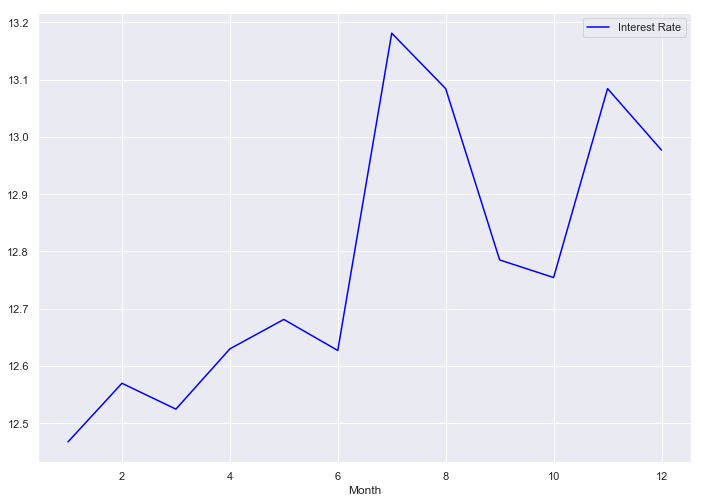

In [45]:
impute_grps.plot(kind='line',x='Month',y='Interest Rate',color='blue')

In [65]:
ct=pd.crosstab(mike_df.emp_length, mike_df.title, values=mike_df.rd_loan_amnt, aggfunc='sum').round(0)
#ct.plot.bar(stacked=True)
#plt.legend(title='mark')
pd.options.display.float_format = '{:,}'.format

ct

title,Business,Car financing,Credit card refinancing,Debt consolidation,Green loan,Home buying,Home improvement,Major purchase,Medical expenses,Moving and relocation,Other,Vacation
emp_length,,,,,,,,,,,,
0.0,2.0,4.0,120.0,316.0,0.0,7.0,40.0,9.0,7.0,2.0,30.0,2.0
1.0,20.0,8.0,336.0,665.0,1.0,13.0,59.0,28.0,9.0,6.0,62.0,2.0
2.0,8.0,5.0,192.0,381.0,0.0,8.0,35.0,19.0,6.0,3.0,36.0,1.0
3.0,8.0,4.0,170.0,360.0,0.0,7.0,35.0,15.0,5.0,3.0,34.0,2.0
4.0,6.0,3.0,129.0,274.0,0.0,6.0,29.0,12.0,4.0,2.0,26.0,1.0
5.0,6.0,4.0,126.0,279.0,0.0,6.0,32.0,12.0,4.0,2.0,26.0,1.0
6.0,4.0,2.0,91.0,202.0,0.0,4.0,24.0,8.0,4.0,1.0,16.0,1.0
7.0,4.0,2.0,76.0,165.0,0.0,4.0,19.0,7.0,3.0,1.0,14.0,1.0
8.0,3.0,2.0,68.0,151.0,0.0,3.0,18.0,6.0,2.0,1.0,13.0,1.0


C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


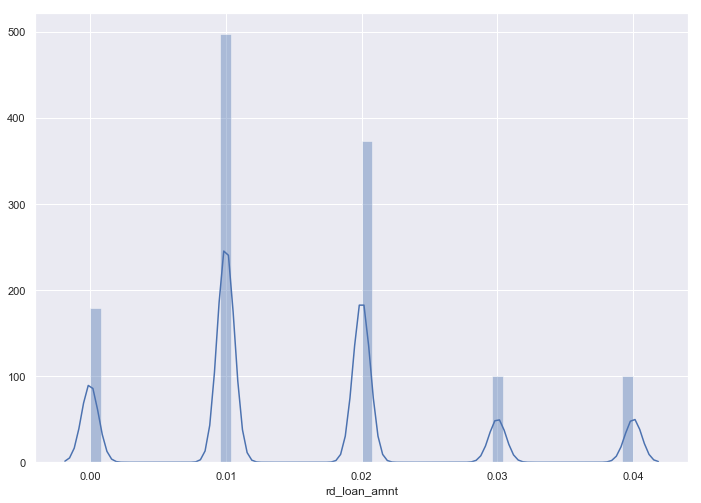

In [62]:
sns.distplot(mike_df.rd_loan_amnt.dropna())

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


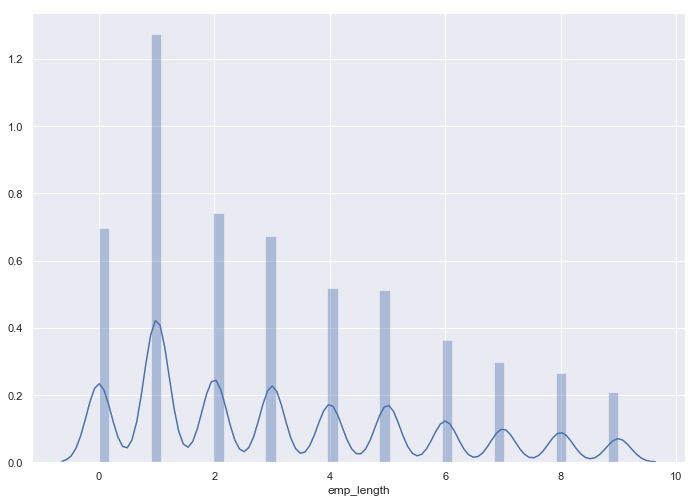

In [48]:
sns.distplot(mike_df.emp_length.dropna())

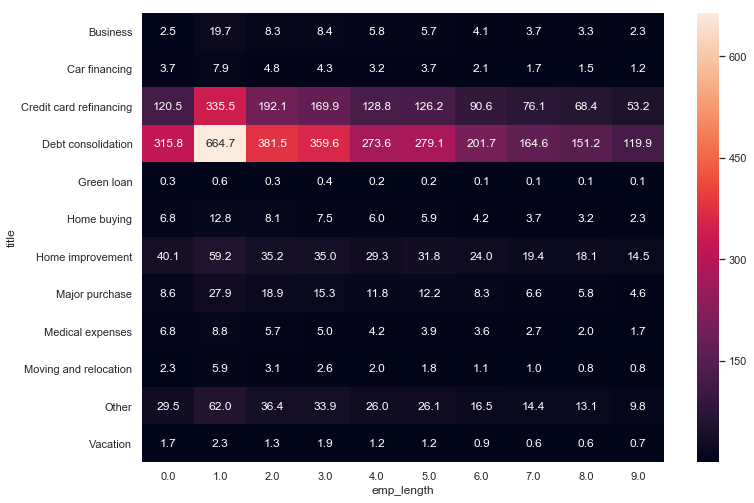

In [64]:
ct1 = mike_df.pivot_table(index='title',columns='emp_length', values='rd_loan_amnt', aggfunc=np.sum)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(ct1, annot=True, fmt=".1f")

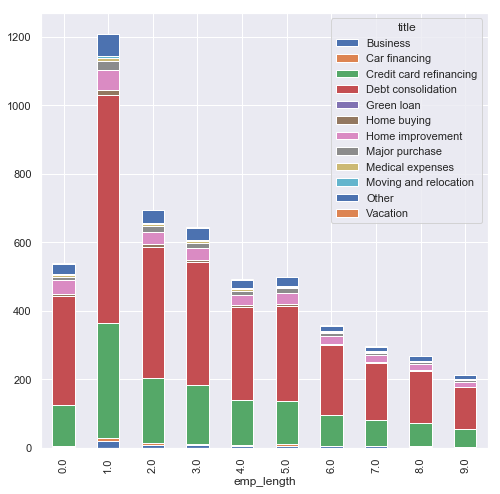

In [66]:
ct.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

# Juhlian's Code